From Megan's notes at: https://uoregonctn.atlassian.net/wiki/spaces/DE/pages/1744076802/RTFS+and+Stop+Signal+Distress

### The plan

Neural activity of the go trial immediately following a failed stop compared to (all/previous trial) go trials following a correct stop. For each subject, run the following to get an individual difference measure.  Here is a univariate version, that is less sensitive. 

Step 1: Find a mask from dACC

Step 2: What if you do a machine learning classifier or similarity/dissimilarity matrix within the voxels from step 1 (< more direct measure) 

Step 3: Obtain the correlation between the post-failure versus post-correct, then regress this on FFQ.

Step 4: Repeat for emotional regulation 

Work with Rob or Dasha to look at Individual difference measure #2, a post no error minus pre no error comparison as a control.  (OR post error versus the next post correct)  

### Using existing betas

1. load the betas
2. do behavioral analysis to identify post-failure and post-current events
3. Take the correlations between each.


### Using a beta-average approach

1. Do behavioral analyses to identify post-failure and post-current events
2. From this, create a beta series
3. Do extraction.
4. Run correlation.

Although we have to work a bit harder to get it, I'm going to use the second method because I think it'll be more reliable.

We modify multiconds.py to do the job.

This file takes content from regress_on_nogo_go_pattern.

#### Setup

In [1]:
import sys
import os
import pandas as pd
from os import path

import pickle
from IPython.core.display import display, HTML, Markdown

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'posterror_conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)
#get the masks we want




python initialized for apply_loocv_and_save
4


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
def condition_resp_trans_func(X):
    return(X.condition_label)

In [3]:

def decoderConstructor(*args, **kwargs):
    return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))

In [4]:
background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [5]:
def visualize_corr(neural_var,correlate,data):
    display(HTML(correlate))
    nan_rows = np.isnan(ind_div_combined[correlate])
    cor2way_df = data.loc[nan_rows==False,]
    pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
    display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
    cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
    cplot.axes.set_xlabel(neural_var)
    cplot.axes.set_ylabel(correlate)
    pyplot.show()

In [ ]:
neurosynth_error_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/error_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()

plotting.plot_img(
    neurosynth_error_mask,
    threshold='auto',
    cmap='autumn',
    
    bg_img=background_img)

results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_neurosynth_error_mask.pkl"


print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

np.mean(results[0])

### emotion regulation mask

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_neurosynth_emo_reg_mask.pkl
0.691358024691358


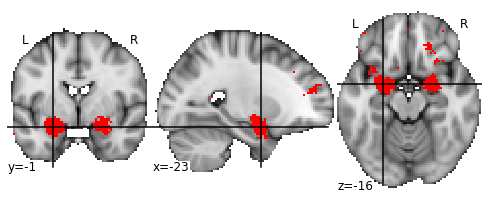

In [11]:
neurosynth_emo_reg_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/emotion regulation_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()

plotting.plot_img(
    neurosynth_emo_reg_mask,
    threshold='auto',
    cmap='autumn',
    
    bg_img=background_img)

results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_neurosynth_emo_reg_mask.pkl"


print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

### What next?

Try whole-brain?

In [49]:
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

#set vars for the function

#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_40subs_twoclasses_pfcmask_repeat1.pkl"
results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_wholebrain.pkl"
#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_58subs_twoclasses_pfcmask_repeat1.pkl"

def decoderConstructor(*args, **kwargs):
    return(Decoder(scoring='accuracy',verbose=0, *args, **kwargs))

In [13]:
print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888


### Compare back to the brain data

In [ ]:
relevant_mask = neurosynth_error_mask

In [ ]:
print(results_filepath)

In [ ]:
PostError_ns=nlt.Brain_Data(results[3]['CorrectGoFollowingFailedStop'])
PostCorrect_ns=nlt.Brain_Data(results[3]['CorrectGoFollowingCorrectStop'])

In [ ]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting

In [ ]:
bd=pickle.load(open(brain_data_filepath,'rb'))
bd_PostError=bd[bd.X.condition_label=="CorrectGoFollowingFailedStop"]

In [ ]:
bd.X.condition_label.value_counts()

In [ ]:
bd_masked = bd.apply_mask(relevant_mask)
PostError_ns_masked = PostError_ns.apply_mask(relevant_mask)
PostCorrect_ns_masked = PostCorrect_ns.apply_mask(relevant_mask)

In [ ]:
# bd.X['PostError_similarity'] = bd_masked.similarity(PostError_ns_masked,method='dot_product')
# bd.X['PostCorrect_similarity'] = bd_masked.similarity(PostCorrect_ns_masked,method='dot_product')
bd.X['PostError_similarity'] = bd_masked.similarity(PostError_ns,method='correlation')
bd.X['PostCorrect_similarity'] = bd_masked.similarity(PostCorrect_ns,method='correlation')

In [ ]:
bd.X.groupby('condition_label').agg({'PostError_similarity':"mean","PostCorrect_similarity":"mean"})

In [ ]:
from matplotlib import pyplot

bins=np.linspace(-0.7,0.3,21) #create histogram bins

pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop','PostError_similarity'],bins=bins, alpha=0.5,label='PostCorrect')
pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop','PostError_similarity'],bins=bins,alpha=0.5,label='PostError')

In [27]:
HTML(pd.DataFrame(bd.X.groupby('condition_label').agg({
    'PostError_similarity':"mean",
    'PostCorrect_similarity':"mean"})).to_html())

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,-0.041247,0.041247
CorrectGoFollowingFailedStop,-0.131918,0.131918


In [28]:
pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)

In [29]:
pes_data.sample(10)

,subid,pes_mean_limited
137,DEV149,0.059445
99,DEV104,-0.006587
11,DEV014,0.001683
29,DEV032,-0.020991
107,DEV112,-0.001149
134,DEV143,-0.010992
71,DEV074,-0.034780
104,DEV109,0.027717
126,DEV133,0.087004
111,DEV116,-0.012643


In [30]:
individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

In [31]:
individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')

In [32]:
subject_pc_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop',['subject','PostError_similarity','PostCorrect_similarity']]
subject_pe_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop',['subject','PostError_similarity','PostCorrect_similarity']]

subject_pc_neural_performance.columns = ['PC_trials_' + col for col in subject_pc_neural_performance.columns]
subject_pe_neural_performance.columns = ['PE_trials_' + col for col in subject_pe_neural_performance.columns]
subject_neural_performance = subject_pc_neural_performance.merge(subject_pe_neural_performance,left_on='PC_trials_subject',right_on='PE_trials_subject',how='outer')
subject_neural_performance =subject_neural_performance.rename(columns = {'PC_trials_subject':'subject'})

In [33]:
ind_div_combined = subject_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')

In [34]:
", ".join(ind_div_combined.columns)

'subject, PC_trials_PostError_similarity, PC_trials_PostCorrect_similarity, PE_trials_subject, PE_trials_PostError_similarity, PE_trials_PostCorrect_similarity, cancer_promoting_minus_preventing_FCI, cancer_promoting_minus_preventing_FFQ, cancer_promoting_minus_preventing_craved_FCI, cancer_promoting_minus_preventing_craved_FFQ, cancer_promoting_minus_preventing_liked_FCI, cancer_promoting_minus_preventing_liked_FFQ, cancer_promoting_FCI, cancer_promoting_FFQ, cancer_preventing_FCI, cancer_preventing_FFQ, BSCS, cSES, EDM, BIS_11, PCS, RS, TRSQ, bf_1, weight_0, ACES_abuse, ACES_neglectful_parenting, ACES_sum, ACES_household_dysfunction, ACES_divorced_separated, BFI_agreeableness, BFI_conscientiousness, BFI_extraversion, BFI_neuroticism, BFI_openness, DEMO_mcarthur_social_standing, IMI_value_usefulness, IMI_perceived_choice, IMI_perceived_competence, IMI_effort_importance, IMI_interest_enjoyment, IPAQ_sittinghours, IPAQ_moderateminutes, IPAQ_vigorousminutes, IPAQ_walkingminutes, NCS_get_

In [35]:
from scipy.stats import pearsonr

### PE_trials_PostError_similarity

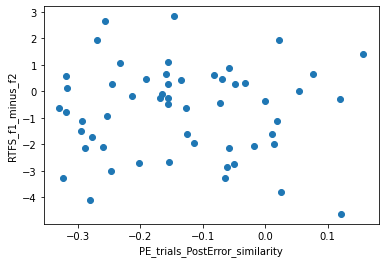

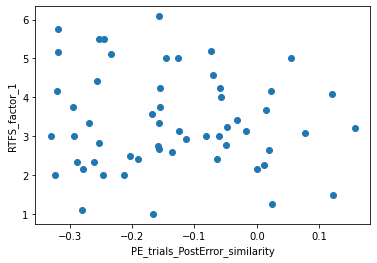

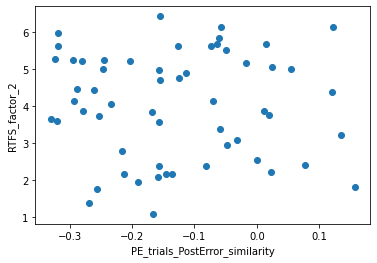

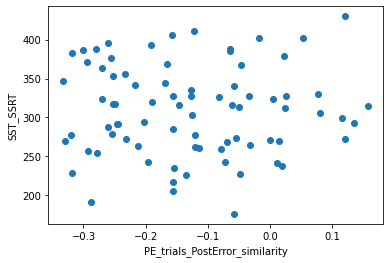

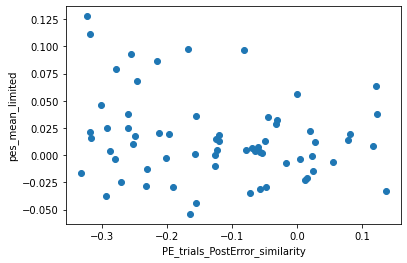

### PC_trials_PostCorrect_similarity

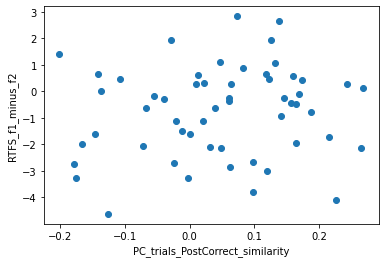

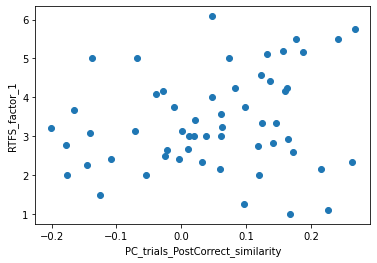

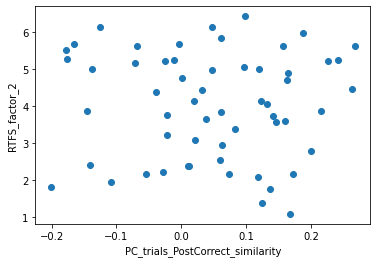

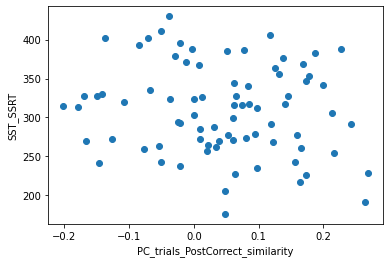

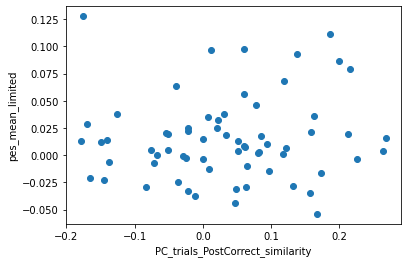

In [36]:
for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited']:
        visualize_corr(neural_var,correlate,ind_div_combined)

***have we tried getting the CONTRAST of each subjects two images and (a) measuring performance by classification of that contrast; (b) measuring similarity of that?***

In [38]:
bd.X.reset_index(inplace=True,drop=True)

bd_contrast = None
for subject in np.unique(bd.X.subject):
    print(subject,end=", ")
    #get all the indices of images with this subject
    #ensure that we have exactly two images for this subject
    subj_indices = bd.X.index[bd.X.subject==subject]
    if len(subj_indices)!=2:
        raise Exception("should be precisely two images for each subject. there wasn't. look into this.")

    subject_bd = bd[subj_indices]
    condition_0_image = subject_bd[subject_bd.X.condition_label=="CorrectGoFollowingCorrectStop"]
    condition_1_image = subject_bd[subject_bd.X.condition_label=="CorrectGoFollowingFailedStop"]
    
    subject_failed_stop_minus_correct_stop = condition_1_image - condition_0_image
    #remove items that aren't relevant for the contrast.
    subject_failed_stop_minus_correct_stop.X.drop(['condition_index','condition_label','raw_beta_description','beta'],axis=1,inplace=True)
    
    if bd_contrast is None:
        bd_contrast = subject_failed_stop_minus_correct_stop
    else:
        bd_contrast = bd_contrast.append(subject_failed_stop_minus_correct_stop)
    

bd_contrast.X.reset_index(inplace=True,drop=True)

DEV005, DEV006, DEV010, DEV011, DEV013, DEV014, DEV015, DEV016, DEV017, DEV018, DEV019, DEV020, DEV021, DEV022, DEV023, DEV024, DEV026, DEV027, DEV028, DEV029, DEV030, DEV034, DEV035, DEV036, DEV039, DEV040, DEV041, DEV042, DEV043, DEV046, DEV047, DEV048, DEV049, DEV050, DEV051, DEV052, DEV053, DEV055, DEV056, DEV057, DEV058, DEV059, DEV060, DEV062, DEV064, DEV067, DEV068, DEV069, DEV071, DEV073, DEV074, DEV076, DEV077, DEV079, DEV083, DEV084, DEV085, DEV086, DEV087, DEV089, DEV097, DEV105, DEV107, DEV135, DEV141, DEV145, DEV157, DEV158, DEV159, DEV164, DEV169, DEV171, DEV173, DEV177, DEV186, DEV197, DEV206, DEV215, DEV216, DEV217, DEV218, 

In [39]:
PostError_similarity = (bd_contrast.apply_mask(relevant_mask).similarity(PostError_ns))
bd_contrast.X['PostError_similarity'] = PostError_similarity

PostCorrect_similarity = (bd_contrast.apply_mask(relevant_mask).similarity(PostCorrect_ns))
bd_contrast.X['PostCorrect_similarity'] = PostCorrect_similarity

In [40]:
bd_contrast.X

,subject,wave,PostError_similarity,PostCorrect_similarity
0,DEV005,1,-0.125604,0.125604
1,DEV006,1,-0.019766,0.019766
2,DEV010,1,-0.146325,0.146325
3,DEV011,1,-0.075494,0.075494
4,DEV013,1,0.011118,-0.011118
...,...,...,...,...
76,DEV206,1,-0.380831,0.380831
77,DEV215,1,0.152703,-0.152703
78,DEV216,1,-0.118076,0.118076
79,DEV217,1,-0.091171,0.091171


In [41]:
bd_contrast.X.agg({'PostError_similarity':"mean","PostCorrect_similarity":"mean"})

PostError_similarity     -0.090942
PostCorrect_similarity    0.090942
dtype: float64

In [42]:
ind_div_contrast_combined = bd_contrast.X.merge(individual_differences,left_on='subject',right_on='subject',how='left')

In [43]:
ind_div_contrast_combined

,subject,wave_x,PostError_similarity,PostCorrect_similarity,cancer_promoting_minus_preventing_FCI,cancer_promoting_minus_preventing_FFQ,cancer_promoting_minus_preventing_craved_FCI,cancer_promoting_minus_preventing_craved_FFQ,cancer_promoting_minus_preventing_liked_FCI,cancer_promoting_minus_preventing_liked_FFQ,...,SRHI_healthy_minus_unhealthy,RTFS_f1_minus_f2,IPAQ_walkingMETminutes,IPAQ_moderateMETminutes,IPAQ_vigorousMETminutes,IPAQ_total_METminutes,IPAQ_MET_kCal,wave_y,subid,pes_mean_limited
0,DEV005,1,-0.125604,0.125604,0.083871,0.321154,0.044086,NaN,0.123656,NaN,...,-38.0,NaN,99.0,160.0,8.0,267.0,NaN,1.0,DEV005,0.046523
1,DEV006,1,-0.019766,0.019766,0.430645,-0.603846,0.449462,NaN,0.411828,NaN,...,-16.0,NaN,1039.5,1080.0,8.0,2127.5,NaN,1.0,DEV006,0.004088
2,DEV010,1,-0.146325,0.146325,-0.661290,-0.323077,-0.815054,NaN,-0.507527,NaN,...,-19.0,NaN,33.0,60.0,120.0,213.0,NaN,1.0,DEV010,0.028680
3,DEV011,1,-0.075494,0.075494,0.698387,-0.242308,0.947312,NaN,0.449462,NaN,...,-16.0,NaN,9504.0,540.0,3840.0,13884.0,NaN,1.0,DEV011,-0.010141
4,DEV013,1,0.011118,-0.011118,-0.227419,-0.788462,-0.320430,NaN,-0.134409,NaN,...,-14.0,2.666667,3.3,2400.0,4800.0,7203.3,10401.093624,1.0,DEV013,0.092723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,DEV206,1,-0.380831,0.380831,1.133871,-0.194231,1.474194,NaN,0.793548,NaN,...,-23.0,-0.636364,0.0,0.0,240.0,240.0,NaN,1.0,NaN,NaN
77,DEV215,1,0.152703,-0.152703,-0.077957,-0.773077,0.176344,NaN,-0.332258,NaN,...,-34.0,0.416667,148.5,240.0,240.0,628.5,NaN,1.0,NaN,NaN
78,DEV216,1,-0.118076,0.118076,1.033333,-0.405769,1.149462,NaN,0.917204,NaN,...,-49.0,0.298246,99.0,360.0,600.0,1059.0,NaN,1.0,NaN,NaN
79,DEV217,1,-0.091171,0.091171,-0.519892,-0.676923,-0.559140,NaN,-0.480645,NaN,...,-14.0,2.833333,165.0,60.0,160.0,385.0,NaN,1.0,NaN,NaN


### PostError_similarity

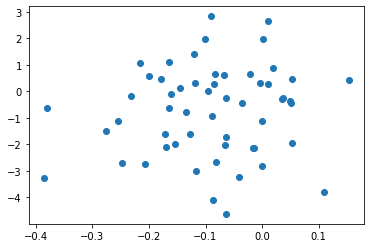

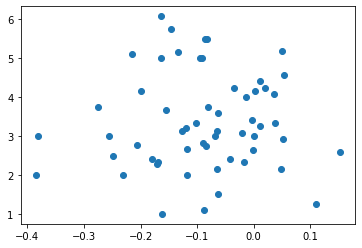

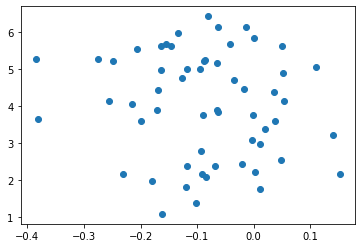

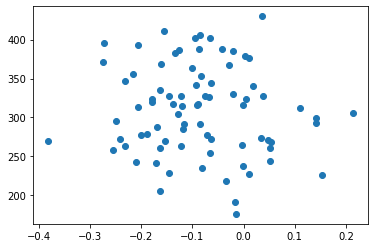

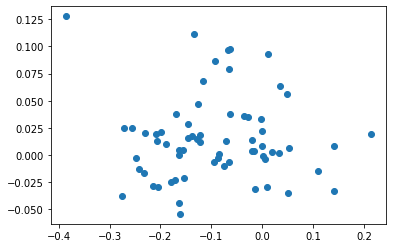

In [44]:
for neural_var in ['PostError_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited']:
        display(HTML(correlate))
        nan_rows = np.isnan(ind_div_contrast_combined[correlate])
        cor2way_df = ind_div_contrast_combined.loc[nan_rows==False,]
        pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
        display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
        cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
        cplot.axes.set_xlabelxlabel=neural_var
        cplot.axes.ylabel=correlate
        pyplot.show()

### ACC mask analysis

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_accmask.pkl
0.6049382716049383


### CorrectGoFollowingCorrectStop

### CorrectGoFollowingFailedStop

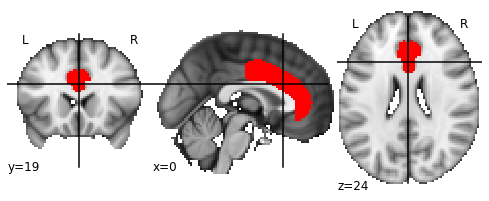

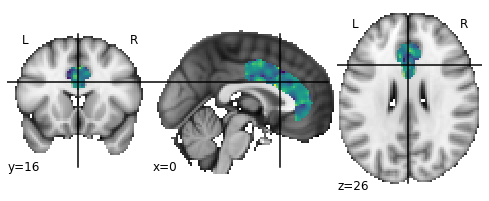

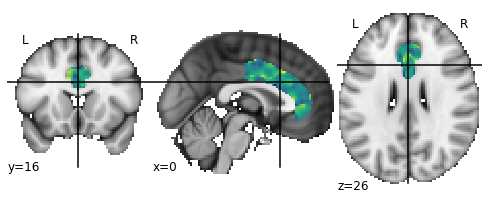

In [45]:
acc_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz').threshold(binarize=True,upper=25).to_nifti()

background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

from nilearn import plotting
plotting.plot_img(acc_mask,
    threshold='auto',
    cmap='autumn',
    bg_img=background_img)


brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_58subs_correct_cond.pkl'
#brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_conditions_43subs_correct_cond.pkl'

#set vars for the function

#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_40subs_twoclasses_pfcmask_repeat1.pkl"
results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_accmask.pkl"
#results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_58subs_twoclasses_pfcmask_repeat1.pkl"


print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
display(Markdown("### CorrectGoFollowingCorrectStop"))
plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
display(Markdown("### CorrectGoFollowingFailedStop"))
plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_accmask.pkl


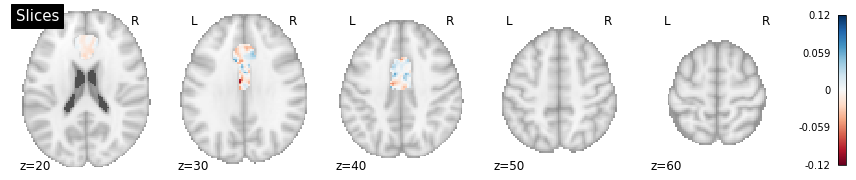

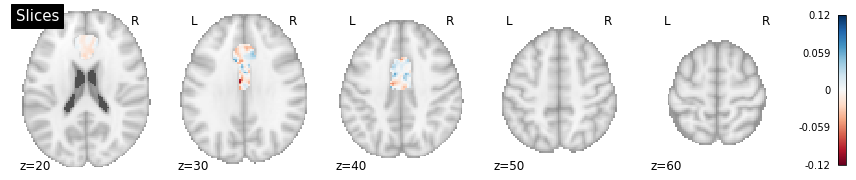

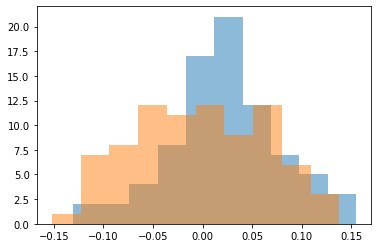

### PE_trials_PostError_similarity

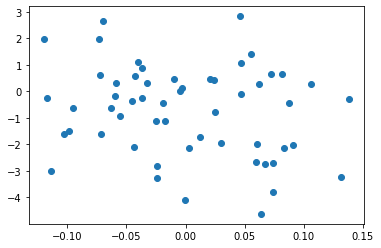

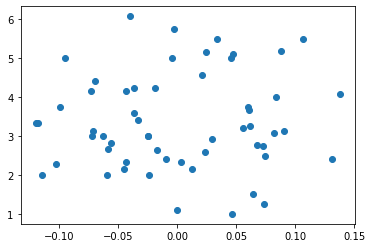

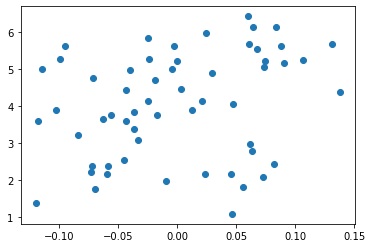

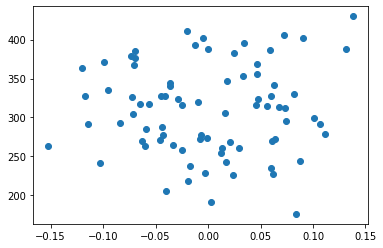

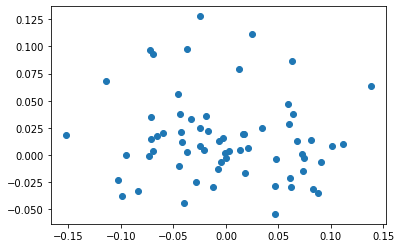

### PC_trials_PostCorrect_similarity

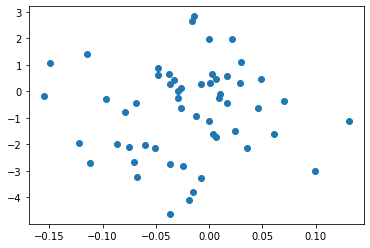

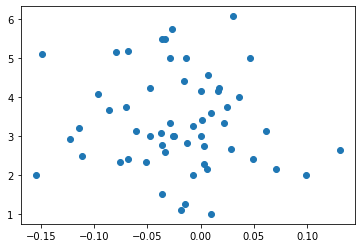

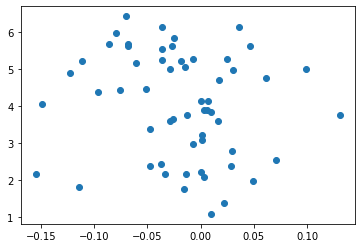

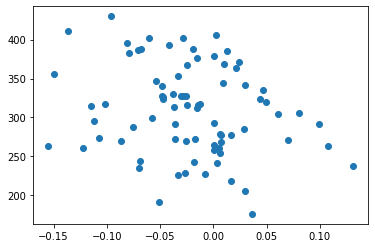

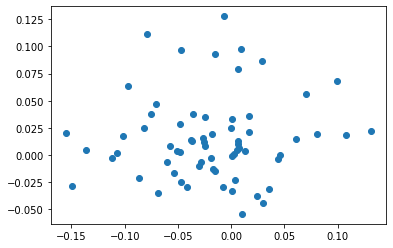

In [46]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from matplotlib import pyplot
from scipy.stats import pearsonr

relevant_mask = neurosynth_error_mask
print(results_filepath)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']

plotting.plot_stat_map(PostError_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')

plotting.plot_stat_map(PostError_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')
pyplot.show()
bd=pickle.load(open(brain_data_filepath,'rb'))
bd_PostError=bd[bd.X.condition_label=="CorrectGoFollowingFailedStop"]

bd.X.condition_label.value_counts()


PostError_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostError_ns))
bd.X['PostError_similarity'] = PostError_similarity

PostCorrect_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostCorrect_ns))
bd.X['PostCorrect_similarity'] = PostCorrect_similarity

bd.X.groupby('condition_label').agg({'PostError_similarity':"mean","PostCorrect_similarity":"mean"})

bins=np.linspace(0,0.5,21) #create histogram bins

pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop','PostError_similarity'],alpha=0.5,label='PostCorrect')
pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop','PostError_similarity'],alpha=0.5,label='PostError')
pyplot.show()
HTML(pd.DataFrame(bd.X.groupby('condition_label').agg({
    'PostError_similarity':"mean",
    'PostCorrect_similarity':"mean"})).to_html())

pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)

individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')

subject_pc_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop',['subject','PostError_similarity','PostCorrect_similarity']]
subject_pe_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop',['subject','PostError_similarity','PostCorrect_similarity']]

subject_pc_neural_performance.columns = ['PC_trials_' + col for col in subject_pc_neural_performance.columns]
subject_pe_neural_performance.columns = ['PE_trials_' + col for col in subject_pe_neural_performance.columns]
subject_neural_performance = subject_pc_neural_performance.merge(subject_pe_neural_performance,left_on='PC_trials_subject',right_on='PE_trials_subject',how='outer')
subject_neural_performance =subject_neural_performance.rename(columns = {'PC_trials_subject':'subject'})

ind_div_combined = subject_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')

for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited']:
        display(HTML(correlate))
        nan_rows = np.isnan(ind_div_combined[correlate])
        cor2way_df = ind_div_combined.loc[nan_rows==False,]
        pearson_result = pearsonr(cor2way_df[neural_var],cor2way_df[correlate])
        display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
        cplot = pyplot.scatter(cor2way_df[neural_var],cor2way_df[correlate])
        cplot.axes.set_xlabelxlabel=neural_var
        cplot.axes.ylabel=correlate
        pyplot.show()

## emotional regulation

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_neurosynth_emo_reg_mask.pkl
0.691358024691358


### CorrectGoFollowingCorrectStop

### CorrectGoFollowingFailedStop

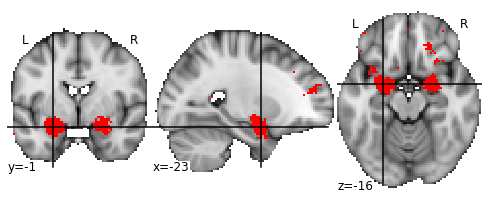

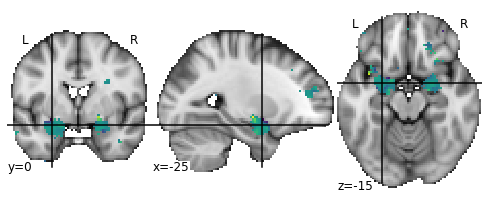

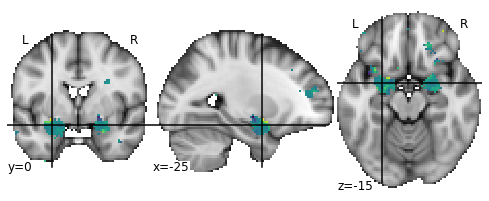

In [47]:
neurosynth_emo_reg_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/emotion regulation_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()

plotting.plot_img(
    neurosynth_emo_reg_mask,
    threshold='auto',
    cmap='autumn',
    
    bg_img=background_img)

results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_neurosynth_emo_reg_mask.pkl"

brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

results[3]

PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
display(Markdown("### CorrectGoFollowingCorrectStop"))
plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
display(Markdown("### CorrectGoFollowingFailedStop"))
plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_neurosynth_emo_reg_mask.pkl


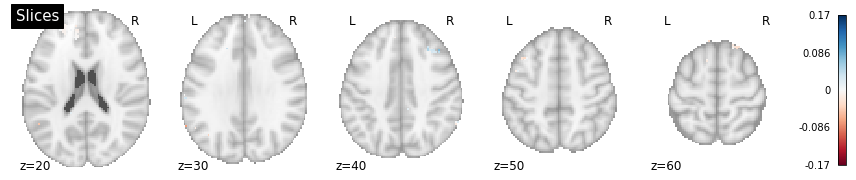

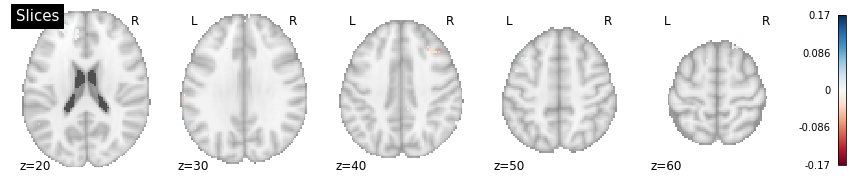

KeyboardInterrupt: 

In [48]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from matplotlib import pyplot
from scipy.stats import pearsonr

relevant_mask = neurosynth_error_mask
print(results_filepath)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']

plotting.plot_stat_map(PostError_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')

plotting.plot_stat_map(PostCorrect_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')
pyplot.show()
bd=pickle.load(open(brain_data_filepath,'rb'))
bd_PostError=bd[bd.X.condition_label=="CorrectGoFollowingFailedStop"]

bd.X.condition_label.value_counts()


PostError_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostError_ns))
bd.X['PostError_similarity'] = PostError_similarity

PostCorrect_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostCorrect_ns))
bd.X['PostCorrect_similarity'] = PostCorrect_similarity

bd.X.groupby('condition_label').agg({'PostError_similarity':"mean","PostCorrect_similarity":"mean"})

bins=np.linspace(0,0.5,21) #create histogram bins

pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop','PostError_similarity'],alpha=0.5,label='PostCorrect')
pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop','PostError_similarity'],alpha=0.5,label='PostError')
pyplot.show()
HTML(pd.DataFrame(bd.X.groupby('condition_label').agg({
    'PostError_similarity':"mean",
    'PostCorrect_similarity':"mean"})).to_html())

pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)

individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')

subject_pc_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop',['subject','PostError_similarity','PostCorrect_similarity']]
subject_pe_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop',['subject','PostError_similarity','PostCorrect_similarity']]

subject_pc_neural_performance.columns = ['PC_trials_' + col for col in subject_pc_neural_performance.columns]
subject_pe_neural_performance.columns = ['PE_trials_' + col for col in subject_pe_neural_performance.columns]
subject_neural_performance = subject_pc_neural_performance.merge(subject_pe_neural_performance,left_on='PC_trials_subject',right_on='PE_trials_subject',how='outer')
subject_neural_performance =subject_neural_performance.rename(columns = {'PC_trials_subject':'subject'})

ind_div_combined = subject_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')


## whole brain

In [ ]:
neurosynth_emo_reg_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/emotion regulation_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()

plotting.plot_img(
    neurosynth_emo_reg_mask,
    threshold='auto',
    cmap='autumn',
    
    bg_img=background_img)

results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_wholebrain.pkl"

brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

results[3]

PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
display(Markdown("### CorrectGoFollowingCorrectStop"))
plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
display(Markdown("### CorrectGoFollowingFailedStop"))
plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

In [ ]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from matplotlib import pyplot
from scipy.stats import pearsonr

relevant_mask = neurosynth_error_mask
print(results_filepath)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']

plotting.plot_stat_map(PostError_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')

plotting.plot_stat_map(PostCorrect_ns, display_mode='z',
                       cut_coords=range(20, 61, 10), title='Slices',cmap='RdBu')
pyplot.show()
bd=pickle.load(open(brain_data_filepath,'rb'))
bd_PostError=bd[bd.X.condition_label=="CorrectGoFollowingFailedStop"]

bd.X.condition_label.value_counts()


PostError_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostError_ns))
bd.X['PostError_similarity'] = PostError_similarity

PostCorrect_similarity = (bd.apply_mask(relevant_mask).
    similarity(PostCorrect_ns))
bd.X['PostCorrect_similarity'] = PostCorrect_similarity

bd.X.groupby('condition_label').agg({'PostError_similarity':"mean","PostCorrect_similarity":"mean"})

bins=np.linspace(0,0.5,21) #create histogram bins

pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop','PostError_similarity'],alpha=0.5,label='PostCorrect')
pyplot.hist(bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop','PostError_similarity'],alpha=0.5,label='PostError')
pyplot.show()
HTML(pd.DataFrame(bd.X.groupby('condition_label').agg({
    'PostError_similarity':"mean",
    'PostCorrect_similarity':"mean"})).to_html())

pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)

individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1
#individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')

subject_pc_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingCorrectStop',['subject','PostError_similarity','PostCorrect_similarity']]
subject_pe_neural_performance = bd.X.loc[bd.X.condition_label=='CorrectGoFollowingFailedStop',['subject','PostError_similarity','PostCorrect_similarity']]

subject_pc_neural_performance.columns = ['PC_trials_' + col for col in subject_pc_neural_performance.columns]
subject_pe_neural_performance.columns = ['PE_trials_' + col for col in subject_pe_neural_performance.columns]
subject_neural_performance = subject_pc_neural_performance.merge(subject_pe_neural_performance,left_on='PC_trials_subject',right_on='PE_trials_subject',how='outer')
subject_neural_performance =subject_neural_performance.rename(columns = {'PC_trials_subject':'subject'})

ind_div_combined = subject_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')



In [ ]:
for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited']:
        visualize_corr(neural_var,correlate,ind_div_combined)

#### What could we do to improve these results?

 - Most look more or less normal. There are a few outliers but I don't think we have any justification for trimming them out.
 - We need to revise the SSRT and PES scores to make sure they're configured correctly.
 - We need to make sure we have all the subjects included we want to include and only those we want to include. I haven't quite decided about this. The pre-registration specifically included data collected up to a certain date (August 16?) - do we want that set or do we have another set?
 - For the post-error contrast, would we benefit from contrasting each post-error trial with its pre-error trial? I think that additional contrast would give us an extra level of control. However, we'd probably be moving away from the whole-task-beta approach we've been using now.
 - We might further consider what the appropriate region of interest is. However, I think we've set them appropriately
 - Could use the neurosynth images as neural signatures rather than binary masks
 - dot product instead of correlation